In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
import pickle

from AIS_data_analysis import AIS_tools

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## First Crack at it

In [11]:
# Load AIS Data and Calculate MA Histogram
AIS_df = AIS_tools.resample_time_all(load_pickle=True)[0]
hist_ma201 = AIS_tools.get_ma_histogram_t(AIS_df, 201)
time_bins, bearing_bins, M_int_h = AIS_tools.get_ma_histogram_bt(AIS_df, 201)
print(M_int_h.shape)

(51066, 360)


In [19]:
M_int_h.shape
print(bearing_bins[121])

on_axis = M_int_h[:,120] + M_int_h[:,301]
print(on_axis[100:8660].shape)

120.99998128957552
(8560,)


In [20]:
with (open("/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/Longterm_MA_2015_201.pkl", "rb")) as f:
    nccf15 = pickle.load(f)

In [21]:
SNR, peak_idx, noise_std = nccf15.snr_of_peak_amp('s1b0A')

print(SNR.shape)
print(hist_ma201[100:8660].shape)

(8560,)
(8560,)


Text(0.5, 1.0, 'Total Shipping Mass vs. S1B0A Peak SNR (2015)')

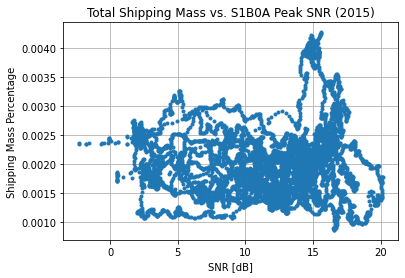

In [33]:
plt.plot(SNR,hist_ma201[100:8660], '.')
plt.grid()
plt.xlabel('SNR [dB]')
plt.ylabel('Shipping Mass Percentage')
plt.title('Total Shipping Mass vs. S1B0A Peak SNR (2015)')

In [30]:
# Calculate correlation coefficient
# Drop all NA values

mask = np.isnan(SNR)

SNR_valid = SNR[~mask]
hma_valid = hist_ma201[np.where(mask==0)]
r = np.corrcoef(SNR_valid, hma_valid)
print(f'R^2 Coefficient: {r[0,1]**2}')

R^2 Coefficient: 0.0009776800604678207


R^2 Coefficient: 0.030744561225956212


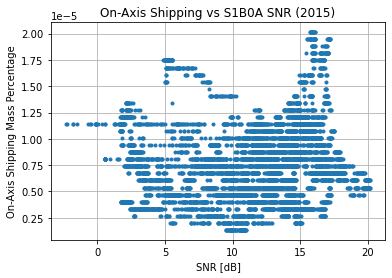

In [35]:
# On Axis vs. SNR
plt.plot(SNR, on_axis[100:8660], '.')
plt.grid()
plt.xlabel('SNR [dB]')
plt.ylabel('On-Axis Shipping Mass Percentage')
plt.title('On-Axis Shipping vs S1B0A SNR (2015)')
mask = np.isnan(SNR)

SNR_valid = SNR[~mask]
hma_valid = on_axis[np.where(mask==0)]
r = np.corrcoef(SNR_valid, hma_valid)
print(f'R^2 Coefficient: {r[0,1]**2}')

## Get all SNRs 